In [13]:
import anndata as ad
import scanpy as sc
import os

In [ ]:
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/gf-6L-30M-i2048_continue/data.h5ad'

adata_v1_continue =ad.read_h5ad(fname)

In [14]:
fname = os.path.expanduser('~/mnt/DATA/brca_full/brca_cells_only_3000cell_4096gene.h5ad')
full_data = ad.read_h5ad(fname)

In [17]:
full_data = full_data[full_data.obs.timepoint=='Pre']

In [18]:
full_data

View of AnnData object with n_obs × n_vars = 41102 × 4096
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg', 'log1p'
    obsm: 'PCA', 'UMAP'
    layers: 'counts', 'logcounts', 'scaledata'

In [20]:
# fname = '/home/jupyter/__output/brca_full/cell_type/Geneformer-V2-104M_continue/data.h5ad'
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/gf-6L-30M-i2048_continue/data.h5ad'
adata_v1_continue =ad.read_h5ad(fname)
adata_v1_continue

AnnData object with n_obs × n_vars = 41101 × 256
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    obsm: 'X_geneformer'

In [19]:
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/Geneformer-V2-104M_continue/data.h5ad'
adata_v2_continue =ad.read_h5ad(fname)
adata_v2_continue

AnnData object with n_obs × n_vars = 41101 × 768
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    obsm: 'X_geneformer'

In [21]:
embedding_key ='X_geneformer'


In [22]:
sc.pp.neighbors(
adata_v1_continue,
use_rep=embedding_key,
n_neighbors=15,
metric="euclidean", 
random_state=0
)

sc.tl.louvain(
    adata_v1_continue,
    key_added="cluster",
    random_state=0,
    resolution=0.3
)

In [25]:
adata_v1_continue

AnnData object with n_obs × n_vars = 41101 × 256
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order', 'cluster'
    uns: 'neighbors', 'cluster'
    obsm: 'X_geneformer'
    obsp: 'distances', 'connectivities'

In [33]:
full_data.uns = adata_v1_continue.uns
full_data.obs['cluster'] = adata_v1_continue.obs['cluster']

In [29]:
full_data

AnnData object with n_obs × n_vars = 41102 × 4096
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'cluster', 'log1p'
    obsm: 'PCA', 'UMAP'
    layers: 'counts', 'logcounts', 'scaledata'

In [30]:
full_data.obs

,orig.ident,nCount_RNA,nFeature_RNA,cell_id,donor_id,timepoint,outcome,Cancer_type,cell_types,cohort,...,sample_id_pre_post_outcome,enough_cells,Study_name,Primary_or_met,RNA_snn_res.0.8,seurat_clusters,ident,n_genes_by_counts,total_counts,n_genes
BIOKEY_13_Pre_GCGGGTTCAATGAATG-1,BIOKEY,4986.0,1918,BIOKEY_13_Pre_GCGGGTTCAATGAATG-1,BIOKEY_13,Pre,n/a,HER2+,Myeloid_cell,treatment_naive,...,BIOKEY_13_Pre_n/a,enough,Bassez,Primary,6,6,6,1918,4986.0,1918
BIOKEY_13_Pre_TGGCTGGAGATCCGAG-1,BIOKEY,10818.0,3438,BIOKEY_13_Pre_TGGCTGGAGATCCGAG-1,BIOKEY_13,Pre,n/a,HER2+,Fibroblast,treatment_naive,...,BIOKEY_13_Pre_n/a,enough,Bassez,Primary,3,3,3,3438,10818.0,3438
BIOKEY_13_Pre_TGAGCCGAGATGTGTA-1,BIOKEY,646.0,411,BIOKEY_13_Pre_TGAGCCGAGATGTGTA-1,BIOKEY_13,Pre,n/a,HER2+,Fibroblast,treatment_naive,...,BIOKEY_13_Pre_n/a,enough,Bassez,Primary,8,8,8,411,646.0,411
BIOKEY_13_Pre_GCGAGAAAGTGCGTGA-1,BIOKEY,3564.0,1588,BIOKEY_13_Pre_GCGAGAAAGTGCGTGA-1,BIOKEY_13,Pre,n/a,HER2+,Fibroblast,treatment_naive,...,BIOKEY_13_Pre_n/a,enough,Bassez,Primary,3,3,3,1588,3564.0,1588
BIOKEY_13_Pre_CTAGTGATCTGTGCAA-1,BIOKEY,7016.0,2180,BIOKEY_13_Pre_CTAGTGATCTGTGCAA-1,BIOKEY_13,Pre,n/a,HER2+,Fibroblast,treatment_naive,...,BIOKEY_13_Pre_n/a,enough,Bassez,Primary,5,5,5,2180,7016.0,2180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BIOKEY_24_Pre_GATTCAGTCAAGGTAA-1,BIOKEY,8436.0,2689,BIOKEY_24_Pre_GATTCAGTCAAGGTAA-1,BIOKEY_24,Pre,NE,ER+,Endothelial_cell,treatment_naive,...,BIOKEY_24_Pre_NE,enough,Bassez,Primary,10,10,10,2689,8436.0,2689
BIOKEY_24_Pre_ACATGGTGTTGGGACA-1,BIOKEY,13452.0,3313,BIOKEY_24_Pre_ACATGGTGTTGGGACA-1,BIOKEY_24,Pre,NE,ER+,T_cell,treatment_naive,...,BIOKEY_24_Pre_NE,enough,Bassez,Primary,20,20,20,3313,13452.0,3313
BIOKEY_24_Pre_GGGACCTTCTCGCTTG-1,BIOKEY,506.0,344,BIOKEY_24_Pre_GGGACCTTCTCGCTTG-1,BIOKEY_24,Pre,NE,ER+,Myeloid_cell,treatment_naive,...,BIOKEY_24_Pre_NE,enough,Bassez,Primary,6,6,6,344,506.0,344
BIOKEY_24_Pre_GTCGGGTGTTGATTGC-1,BIOKEY,3094.0,1072,BIOKEY_24_Pre_GTCGGGTGTTGATTGC-1,BIOKEY_24,Pre,NE,ER+,T_cell,treatment_naive,...,BIOKEY_24_Pre_NE,enough,Bassez,Primary,0,0,0,1072,3094.0,1072


In [10]:
len(adata_v1_continue.var_names)

256

In [32]:
adata_v1_continue.obs['cluster']

BIOKEY_13_Pre_GCGGGTTCAATGAATG-1     4
BIOKEY_13_Pre_TGGCTGGAGATCCGAG-1     3
BIOKEY_13_Pre_TGAGCCGAGATGTGTA-1     3
BIOKEY_13_Pre_GCGAGAAAGTGCGTGA-1     3
BIOKEY_13_Pre_CTAGTGATCTGTGCAA-1     3
                                    ..
BIOKEY_24_Pre_GATTCAGTCAAGGTAA-1     6
BIOKEY_24_Pre_ACATGGTGTTGGGACA-1    11
BIOKEY_24_Pre_GGGACCTTCTCGCTTG-1    10
BIOKEY_24_Pre_GTCGGGTGTTGATTGC-1     0
BIOKEY_24_Pre_TACTCATTCTGCTTGC-1     0
Name: cluster, Length: 41101, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

In [28]:
'CD79A' in list(full_data.var_names)


True

Missing marker genes (not in data): ['KRT18', 'PDPN', 'CD2', 'CD3D', 'CD3E']


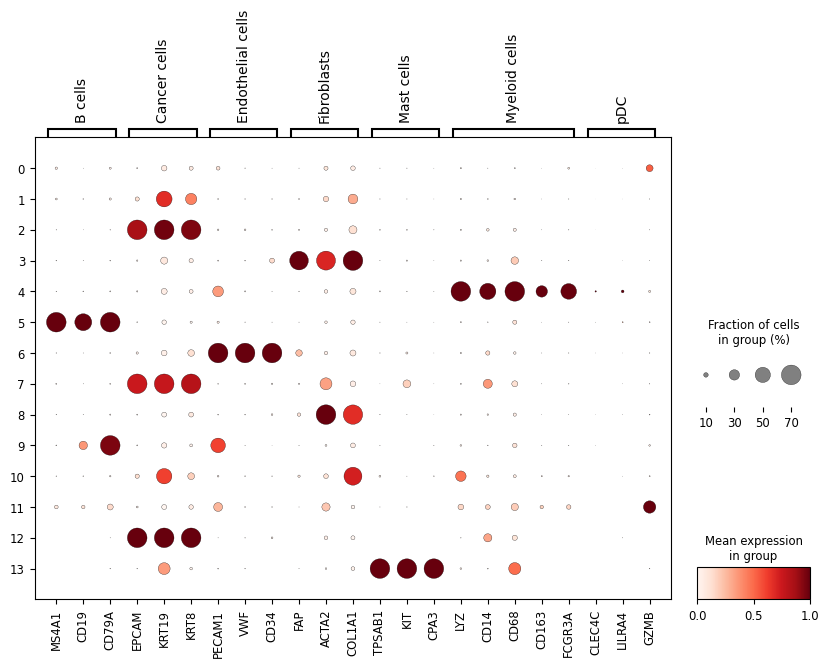

In [34]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = full_data

# Define canonical marker genes for selected TME cell types
marker_dict = {
    "B cells": ['MS4A1', 'CD19', 'CD79A'],
    "Cancer cells": ['EPCAM', 'KRT19', 'KRT8', 'KRT18'],
    "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
    "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
    "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
    "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
    "T cells": ['CD3D', 'CD3E', 'CD2'],
    "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
}
# marker_dict = {
#     "B cells": ['MS4A1', 'CD19', 'CD79A'],
#     "Cancer cells": [
#         # Epithelial markers
#         'EPCAM', 'KRT19', 'KRT8', 'KRT18',
#         # Luminal (ER+) subtype
#         'ESR1', 'PGR', 'GATA3', 'FOXA1',
#         # Basal-like/TNBC
#         'KRT5', 'KRT14', 'EGFR',
#         # HER2+ subtype
#         'ERBB2', 'GRB7',
#         # Proliferation
#         'MKI67', 'AURKA', 'BIRC5',
#         # EMT/stemness
#         'VIM', 'ZEB1', 'CD44', 'ALDH1A1'
#     ],
#     "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
#     "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
#     "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
#     "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
#     "T cells": ['CD3D', 'CD3E', 'CD2'],
#     "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
# }

# Flatten and check which markers are present
all_markers = set(gene for genes in marker_dict.values() for gene in genes)
present_markers = [gene for gene in all_markers if gene in adata.var_names]
missing_markers = [gene for gene in all_markers if gene not in adata.var_names]

print("Missing marker genes (not in data):", missing_markers)

# Reconstruct marker dict using only available genes
filtered_marker_dict = {
    cell_type: [gene for gene in genes if gene in present_markers]
    for cell_type, genes in marker_dict.items()
    if any(gene in present_markers for gene in genes)
}

# Optionally standardize gene expression first
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Dotplot using Scanpy
fig = sc.pl.dotplot(
    adata,
    var_names=filtered_marker_dict,
    groupby='cluster',  # Make sure this matches your clustering column
    standard_scale='var',
    dot_max=0.7,
    color_map='Reds',
    figsize=(10, 6),
    dendrogram=False,
    return_fig=True  # Get the matplotlib figure
)
fig.savefig('dotplot.png', dpi=100)
plt.show()

# GF 2 [continue]

In [36]:
sc.pp.neighbors(
adata_v2_continue,
use_rep=embedding_key,
n_neighbors=15,
metric="euclidean", 
random_state=0
)

sc.tl.louvain(
    adata_v2_continue,
    key_added="cluster",
    random_state=0,
    resolution=0.3
)

In [37]:
full_data.uns = adata_v2_continue.uns
full_data.obs['cluster'] = adata_v2_continue.obs['cluster']

Missing marker genes (not in data): ['KRT18', 'PDPN', 'CD2', 'CD3D', 'CD3E']


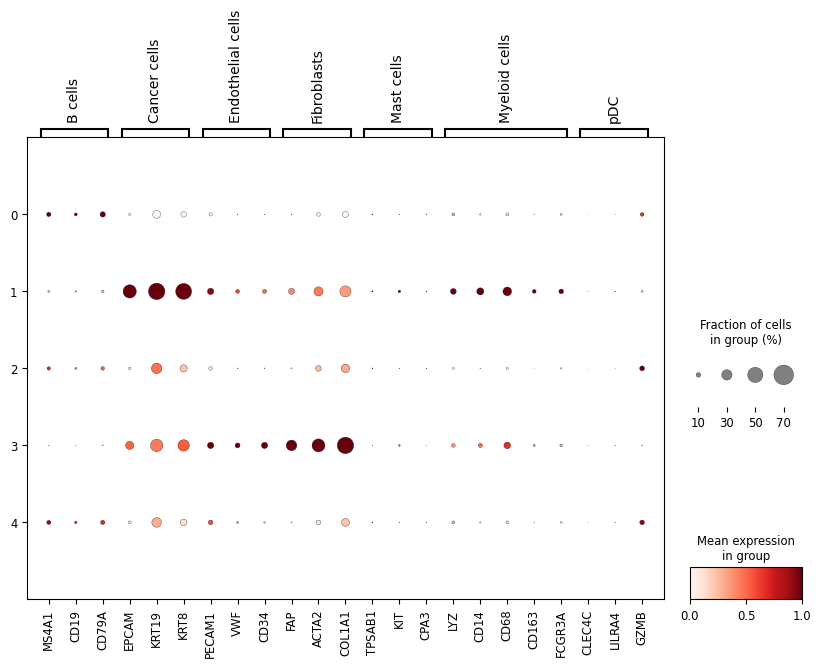

In [39]:
adata = full_data

# Define canonical marker genes for selected TME cell types
marker_dict = {
    "B cells": ['MS4A1', 'CD19', 'CD79A'],
    "Cancer cells": ['EPCAM', 'KRT19', 'KRT8', 'KRT18'],
    "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
    "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
    "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
    "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
    "T cells": ['CD3D', 'CD3E', 'CD2'],
    "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
}
# marker_dict = {
#     "B cells": ['MS4A1', 'CD19', 'CD79A'],
#     "Cancer cells": [
#         # Epithelial markers
#         'EPCAM', 'KRT19', 'KRT8', 'KRT18',
#         # Luminal (ER+) subtype
#         'ESR1', 'PGR', 'GATA3', 'FOXA1',
#         # Basal-like/TNBC
#         'KRT5', 'KRT14', 'EGFR',
#         # HER2+ subtype
#         'ERBB2', 'GRB7',
#         # Proliferation
#         'MKI67', 'AURKA', 'BIRC5',
#         # EMT/stemness
#         'VIM', 'ZEB1', 'CD44', 'ALDH1A1'
#     ],
#     "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
#     "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
#     "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
#     "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
#     "T cells": ['CD3D', 'CD3E', 'CD2'],
#     "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
# }

# Flatten and check which markers are present
all_markers = set(gene for genes in marker_dict.values() for gene in genes)
present_markers = [gene for gene in all_markers if gene in adata.var_names]
missing_markers = [gene for gene in all_markers if gene not in adata.var_names]

print("Missing marker genes (not in data):", missing_markers)

# Reconstruct marker dict using only available genes
filtered_marker_dict = {
    cell_type: [gene for gene in genes if gene in present_markers]
    for cell_type, genes in marker_dict.items()
    if any(gene in present_markers for gene in genes)
}

# Optionally standardize gene expression first
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Dotplot using Scanpy
fig = sc.pl.dotplot(
    adata,
    var_names=filtered_marker_dict,
    groupby='cluster',  # Make sure this matches your clustering column
    standard_scale='var',
    dot_max=0.7,
    color_map='Reds',
    figsize=(10, 6),
    dendrogram=False,
    return_fig=True  # Get the matplotlib figure
)
fig.savefig('dotplot_gf2_continue.png', dpi=100)
plt.show()